In [1]:
from math import *

In [3]:
filename = './log_train/train_16_05.txt'
with open(filename,'r') as f : 
    lines= f.readlines()
print(len(lines))

lines_remove = 0
# text_to_remove = ["Saving to checkpoint","Loading from checkpoint","Done"]
text_to_remove = ["Saving to checkpoint","Loading from checkpoint","Done","EVAL"]
batch_found = False
contain_avg = True
contain_homo = True
# print(lines[53])
for i in lines[:]:
    if any([element in i for element in text_to_remove]):
        lines.remove(i)
        lines_remove+=1
        continue
    if not batch_found:
        if "BATCH" in i:
            step = int(i.split("/")[0][-4:])
            total_batch = int(i.split("/")[1][:4])
            # print(step,total_batch)
            lines_of_batch = int(total_batch/step)
            batch_size = 3712 / total_batch
            # epoch, lr, weight
            lines_of_batch = lines_of_batch + 3
            if contain_homo:
                lines_of_batch+=1
            if contain_avg:
                lines_of_batch+=1
            batch_found = True
    # print(i)

epoch_lst = []
tmp = len(lines)
# for i in range(0,len(lines),lines_of_batch):
#     assert ("TRAIN EPOCH" in lines[i]),"Error from line: {}".format(lines[i-lines_of_batch])

#     current_epoch = int(lines[i][51:55])
#     # print(epoch_lst)
#     assert (current_epoch not in epoch_lst),"Epoch conflict: {}".format(current_epoch)
#     epoch_lst.append(current_epoch)



print("Line removed: {}".format(str(lines_remove)))
print("Batch size: {}".format(str(int(batch_size))))
print("Batch contains {} lines.".format(lines_of_batch))
print("=====================")

3811
Line removed: 31
Batch size: 32
Batch contains 28 lines.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
lenLines = len(lines)
results = []
result_weight_epochs=[]
average_results = []
for i in range(0,lenLines,lines_of_batch):
    tmp= lines[i:i+lines_of_batch]
    # print(i)
    result_epoch=[]
    for j in range(2,len(tmp)):
        if j == 2 :  # weight
            temp=tmp[j].split(':')[4:]
            # print(temp)
            try:
                temp=[float(i.split(',')[0]) for i in temp]
            except ValueError as e:
                print("weight error",e,"on line",i)
            result_weight_epochs.append(temp)
            continue
        elif j == len(tmp) -1: # average
            # temp=tmp[j].split(':')[3:]
            # try:
            #     temp=[float(i.split(',')[0]) for i in temp]
            #     print(temp)
            # except ValueError as e:
            #     print("error",e,"on line",i)
            # average_results.append(temp)
            continue
        elif contain_homo and j == 3:
            continue
        temp=tmp[j].split(':')[3:]
        try:
            temp=[float(i.split(',')[0]) for i in temp]
        except ValueError as e:
            print("loss error",e,"on line",i)
            print(lines[i])
            print()
        # print()
        # if len(temp) != 8: # kiem tra so luong loss
        #     continue
        
        result_epoch.append(temp)
        # print(result_epoch)
        
    # results.append(result_epoch)
    if len(result_epoch) == 0:
        continue
    # t = np.array(result_epoch)
    # if t.shape[0] == 0:
    #     print(t)
    try:
        results.append(np.stack(np.array(result_epoch)))
    except:
        print()
        
        

print(len(result_weight_epochs))
print(len(results))
# print(results)
result_weight_epochs = np.array(result_weight_epochs)
average_results = np.array(average_results)
results = np.array(results)
# result = np.concatenate(results,axis=1)
print(results.shape)
# print(type(result_weight_epochs))
    



loss error could not convert string to float: '  depth_' on line 84
2023-05-16 04:57:29,377   INFO  BATCH[0005/0116] depth_loss:3.0631, heading_loss:2.7740, offset2d_loss:0.8480, offset3d_loss:0.9493, seg_loss:1.2234, size2d_loss:2.7735, size3d_loss:0.4557,



loss error could not convert string to float: '  depth_' on line 112
2023-05-16 05:03:27,902   INFO  BATCH[0010/0116] depth_loss:2.8306, heading_loss:2.6093, offset2d_loss:0.7458, offset3d_loss:0.5240, seg_loss:1.1926, size2d_loss:2.8797, size3d_loss:0.1837,



loss error could not convert string to float: '  depth_' on line 140
2023-05-16 05:09:19,190   INFO  BATCH[0015/0116] depth_loss:2.8311, heading_loss:2.6035, offset2d_loss:0.5554, offset3d_loss:0.4960, seg_loss:1.0992, size2d_loss:2.2912, size3d_loss:0.1866,



loss error could not convert string to float: '  depth_' on line 168
2023-05-16 05:14:59,486   INFO  BATCH[0020/0116] depth_loss:2.4242, heading_loss:2.0854, offset2d_loss:0.5749, offset3d_loss:0.2707, seg_loss:1.

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (135,) + inhomogeneous part.

In [9]:
print(results.shape)
# print(results)
# print(np.mean(results,axis=1).shape)
results_mean=np.mean(results,axis=1)
# print(results_mean[0])
# print(results_mean.shape)

(60, 23, 8)


In [31]:
results_mean.shape

(100,)

In [54]:
# print(results_mean[:,-1])
# print(np.arange(81,81+results.shape[0]))
# x = np.linspace(0, 10, 100)
# print(x)

[0.7254663  0.68405761 0.74637174 0.74235109 0.73160761 0.7295337
 0.7389837  0.69787935 0.71937174 0.69812283 0.73385109 0.6946337
 0.71945109 0.74059674 0.69162283 0.72042065 0.73026848 0.71228152
 0.73922609 0.68216522 0.71571087 0.70124674 0.70666739 0.70868043
 0.70888696 0.71924891 0.68887283 0.66822283 0.71369022 0.71532935
 0.71456739 0.68581957 0.6893837  0.70471413 0.7090163  0.67206304
 0.67692283 0.69189457 0.68549891 0.73549891 0.69906522 0.72287609
 0.65595978 0.68930652 0.70866196 0.68136087 0.70650543 0.7073837
 0.70075    0.71499565 0.67972174 0.71078152 0.68118478 0.68276739
 0.69190435 0.66804783 0.66944348 0.74075326 0.71035109 0.69851522
 0.72863043 0.70437609 0.68209348 0.6981663  0.69817391 0.71005761
 0.67965217 0.67669891 0.72791522 0.7078087 ]
(70,)


In [13]:
results_mean.shape

(140, 7)

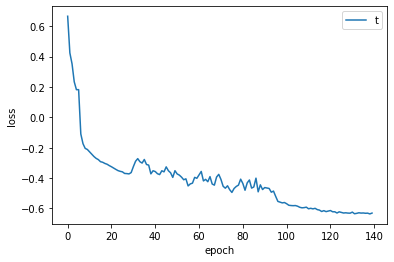

In [21]:
title=['stage1 :offset2d', 'stage1 :seg', 'stage1 :size2d','stage2 :size3d']
# for i in [2,4,5,6]:
plt.plot(results_mean[:,-1])
plt.legend(title[0])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend('test')
# plt.xlim(80,80+results_mean.shape[0])
# plt.ylim(0.6, 1)
#plt.show()

In [ ]:
print(result_weight_epochs[:,2])

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


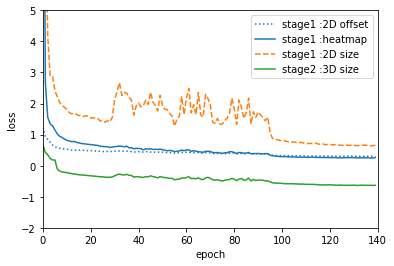

In [36]:
end_epoch = 140
title=['stage1 :2D offset', 'stage1 :heatmap', 'stage1 :2D size','stage2 :3D size']
# for i in [2,4,5,6]:
plt.plot(results_mean[:end_epoch,2],linestyle='dotted')
plt.plot(results_mean[:end_epoch,4],color='#1f77b4')
plt.plot(results_mean[:end_epoch,5],linestyle='dashed')
plt.plot(results_mean[:end_epoch,6])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.xlim(0,end_epoch)
plt.ylim(-2, 5)
    
plt.legend(title)
#plt.show()

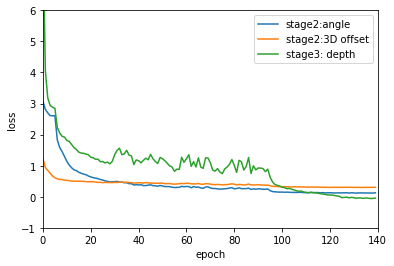

In [40]:
# title=['depth_', 'heading_', 'offset2d_', 'offset3d_', 'seg_', 'size2d_', 'size3d_']
title=['stage2:angle', 'stage2:3D offset', 'stage3: depth']
# depth_loss:, heading_loss:, offset2d_loss:, offset3d_loss:, seg_loss:, size2d_loss:, size3d_loss:
end_epoch = 140
# plt.plot(results_mean[:end_epoch,1])
plt.plot(results_mean[:end_epoch,2])
# plt.plot(results_mean[:end_epoch,0])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim(-1, 6)
plt.xlim(0,end_epoch)
plt.legend(title)


(0.0, 140.0)

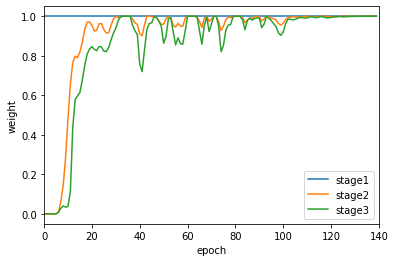

In [41]:
end_epoch = 140
stage1 = (result_weight_epochs[:end_epoch,2] + result_weight_epochs[:end_epoch,4] + result_weight_epochs[:end_epoch,5])/3
stage2 = (result_weight_epochs[:end_epoch,3] + result_weight_epochs[:end_epoch,6] + result_weight_epochs[:end_epoch,1])/3
stage3 = result_weight_epochs[:end_epoch,0]
stage =['stage1','stage2','stage3']
stage_value=[stage1,stage2,stage3]
for i in stage_value:
    plt.plot(i)
plt.xlabel('epoch')
plt.ylabel('weight')
plt.legend(stage)
# plt.ylim(0,1)
plt.xlim(0,end_epoch)

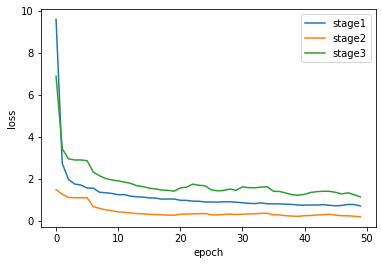

In [ ]:
stage1 = (results_mean[:,2] + results_mean[:,4] + results_mean[:,5])/3
stage2 = (results_mean[:,3] + results_mean[:,6] + results_mean[:,1])/3
stage3 = results_mean[:,0]
stage =['stage1','stage2','stage3']
stage_value=[stage1,stage2,stage3]
for i in stage_value:
    plt.plot(i)
    plt.legend(stage)
    plt.xlabel('epoch')
    plt.ylabel('loss')